In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Part 1 - Prepare SQLAlchemy 

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import create_engine

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# Preview the data model in Db Browser or a similar tool
# (do this to get a sense as to how the database is structured)

# Part 2 - Exploratory Climate Analysis

### Station Analysis

In [7]:
# Design a query to show how many stations are available in this dataset?

stations = pd.read_sql("select count(station) as number_of_stations from measurement", conn)
stations

,number_of_stations
0,19550


In [100]:
# What are the most active stations? (i.e. what stations have the most rows)?

activestations = pd.read_sql(("select s.station, s.name, count(s.station) number_of_stations "
                              "from station s inner join measurement m "
                                "on s.station = m.station "
                                "group by s.station, s.name " 
                                  "order by count(s.station) desc"), conn)
activestations

,station,name,number_of_stations
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [89]:
# List the stations and the counts in descending order.
activestations = pd.read_sql(("select s.station, count(s.station) number_of_stations, s.name " 
                                "from station s join measurement m"
                                  "order by count(station) desc"), conn)
activestations

,number_of_stations
0,9


In [9]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

mostactive = pd.read_sql(('select station, min(tobs) as min_obs, max(tobs) as max_obs, round(avg(tobs),2) as ave_obs'
                         ' from measurement where station = "USC00519281"'), conn)
mostactive


,station,min_obs,max_obs,ave_obs
0,USC00519281,54.0,85.0,71.66


In [90]:
# Choose the station with the highest number of temperature observations.

#by sql
maxtobs = pd.read_sql(
    ("select * from "
     "(select station, count(tobs) as number_of_obs "
     "from measurement group by station "
     "order by 2 desc) "
     "limit 1") , conn)

maxtobs

,station,number_of_obs
0,USC00519281,2772


In [11]:
 # Query the last 12 months of temperature observation data for this station and plot the results as a histogram
 
tobs_data = pd.read_sql("select station, date, tobs from measurement where station = 'USC00519281' " 
        "and date between (select date(max(date), '-12 month') from measurement) and (select max(date) from measurement) "
        "order by date desc", conn)
tobs_data.head()


,station,date,tobs
0,USC00519281,2017-08-18,79.0
1,USC00519281,2017-08-17,76.0
2,USC00519281,2017-08-16,76.0
3,USC00519281,2017-08-15,77.0
4,USC00519281,2017-08-14,77.0


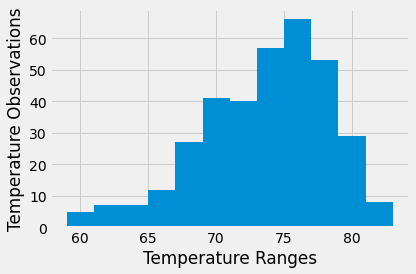

In [12]:
# Plot the results as a histogram with `bins=12`.
x = tobs_data['tobs']
plt.hist(x, density=False, bins=12)
plt.ylabel('Temperature Observations')
plt.xlabel('Temperature Ranges')
plt.tight_layout()
plt.show()


### Precipitation Analysis

In [103]:
# Design a query to retrieve the last 12 months of precipitation data.

# Select only the `date` and `prcp` values.

prcp_query = f"select date, prcp from measurement where prcp <> 0.00 and date between \
                        (select date(max(date), '-12 month') from measurement) \
                        and (select max(date) from measurement) \
                        order by date desc"

prcp_data = pd.read_sql(prcp_query, conn)
prcp_data.head()

,date,prcp
0,2017-08-23,0.08
1,2017-08-23,0.45
2,2017-08-22,0.50
3,2017-08-21,0.02
4,2017-08-21,0.56


In [14]:
#Load the query results into a Pandas DataFrame and set the index to the date column.

#Sort the DataFrame values by `date`.

prcp_df = pd.DataFrame(prcp_data)
prcp_df = prcp_df.sort_values('date', ascending=True)
prcp_df = prcp_df.set_index('date')
prcp_df.head()

,prcp
date,
2016-08-23,0.70
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,0.02
2016-08-23,0.05


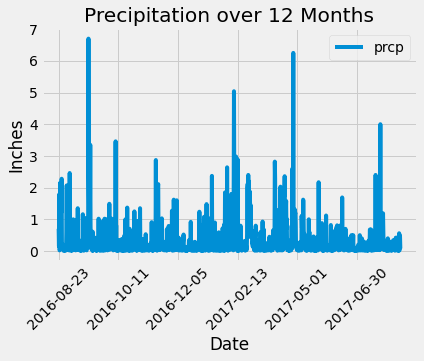

In [84]:
# Plot the results using the DataFrame `plot` method.

prcp_df.plot(rot=45)
plt.ylabel('Inches')
plt.xlabel('Date')
plt.title('Precipitation over 12 Months')
plt.show()

In [85]:
# Use Pandas to print the summary statistics for the precipitation data.
prcp_df.describe()

,prcp
count,1147.000000
mean,0.312363
std,0.576781
min,0.010000
25%,0.030000
50%,0.100000
75%,0.310000
max,6.700000


## Part 3 - Data Analysis Assignment

Temperature Analysis I


#Hawaii is reputed to enjoy mild weather all year. Is there a meaningful difference between the temperature in, for example, June and December?
#You may either use SQLAlchemy or pandas's read_csv() to perform this portion.

In [74]:
#Identify the average temperature in June at all stations across all available years in the dataset. 
#Do the same for December temperature.

avequery = f"select strftime('%m-%Y', date) as Month_Year , avg(tobs) as TAVE, sum(tobs) from measurement 
            where date like '%-06-%'"

avetemp = pd.read_sql(avequery, conn)
avetemp.head()


,Month_Year,TAVE,sum(tobs)
0,06-2010,74.944118,127405.0


In [ ]:
#Use the t-test to determine whether the difference in the means, if any, is statistically significant. 
#Will you use a paired t-test, or an unpaired t-test? Why?


In [18]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
import datetime
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
       
    # your code here 
    engine = create_engine("sqlite:///Resources/hawaii.sqlite")
    conn = engine.connect()
    
    query = f"select max(tobs) as TMAX, min(tobs) as TMIN, round(avg(tobs),2) as TAVE \
                from measurement where date between '{start_date}' and '{end_date}'"
    sd = pd.read_sql(query, conn)
    
    return sd    
        

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

   TMAX  TMIN   TAVE
0  74.0  62.0  69.57


In [19]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date = '2017-07-31'
end_date = '2017-08-15'
print(calc_temps('2017-07-31','2017-08-15'))

   TMAX  TMIN   TAVE
0  84.0  70.0  78.85


In [21]:
#place function results into a dataframe
temps_df = calc_temps('2017-07-31','2017-08-15')

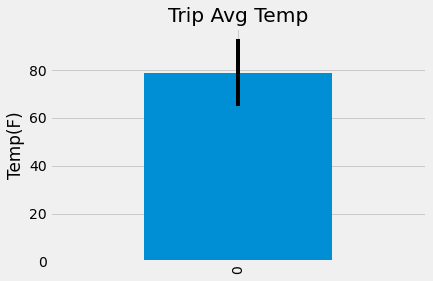

In [23]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

temps_df['TAVE'].plot(kind='bar', yerr = [temps_df['TMAX'] - temps_df['TMIN']])

plt.title("Trip Avg Temp")
plt.ylabel('Temp(F)')
#plt.errorbar(x, y, xerr=0.4, yerr)
#errorbar(x,y, yerr, marker='s', mfd='red', mec = 'green', ms=20, mew=4)

plt.show()

In [32]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

  
rainfall = pd.read_sql(
    ("select s.station, s.name, s.latitude, s.longitude, s.elevation, m.prcp \
        from measurement m \
        inner join station s on m.station = s.station \
        where m.date between '2016-02-01' and '2016-03-15' \
        group by s.station, s.name, s.latitude, s.longitude, s.elevation \
        order by 6 desc"), conn)
rainfall

,station,name,latitude,longitude,elevation,prcp
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.15
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.07
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.00
3,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.00
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.00
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,NaN
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,NaN


In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [52]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

dates = ['2017-08-01','2017-08-02','2017-08-03','2017-08-04','2017-08-05','2017-08-06']
normals = []

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A DataFrame containing the daily normals, tmin, tavg, and tmax
    
    """
    
    # your code here
    engine = create_engine("sqlite:///Resources/hawaii.sqlite")
    cursor = engine.connect()
    
    
    for date in dates:
        cursor.execute("select date, to_char(date, 'mm-dd'), min(tobs) as TMIN, max(tobs) as TMAX, ave(tobs) as TAVE \
                  from measurement where date = '{date}'")
        for result in cursor:
            normals.append(result)
    
            
    return normals

normals    
#daily_normals()

[]

In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
